In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #library to normalize
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, auc, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression   
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import pandas as pd                     
import numpy as np                      
import seaborn as sns                   
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.read_csv('D:/Desktop/machine learning/COPD dataset.csv')
nRow, nCol = df.shape                
print(nRow)
print(nCol)

2900
60


In [2]:
df

,Sex,SBP,DBP,Pulse,Tx_y,PHA,AirPollution,DS,SPY,F_DBT,...,BDR2_FEF_Base,DLCO,DC_DLCO_pcForecast,DC_DLVA_Measure,DC_DLVA_pcForecast,LABA,LAMA,ICS_LABA,Methylxanthine_YN,target_value
0,1.0,120.0,70.0,78.0,16.0,1.0,0.0,20.0,4.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2.0,103.0,70.0,78.0,1.0,0.0,0.0,51.0,51.0,1.0,...,14.0,14.2,80.0,4.01,75.0,0.0,0.0,1.0,0.0,0
2,1.0,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,0.0,...,20.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0
3,2.0,NaN,NaN,NaN,4.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0
4,1.0,NaN,NaN,NaN,1.0,0.0,0.0,45.0,45.0,0.0,...,17.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.0,110.0,70.0,85.0,8.0,0.0,0.0,23.0,23.0,0.0,...,5.0,5.0,31.0,2.95,82.0,0.0,0.0,1.0,NaN,1
2896,1.0,136.0,71.0,82.0,NaN,0.0,0.0,27.0,41.0,1.0,...,49.0,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1
2897,1.0,104.0,56.0,66.0,3.0,NaN,1.0,NaN,NaN,0.0,...,-17.0,11.2,64.0,2.75,80.0,0.0,1.0,0.0,0.0,1
2898,1.0,128.0,74.0,78.0,0.0,0.0,1.0,42.0,42.0,0.0,...,32.0,6.0,38.0,1.84,47.0,0.0,1.0,1.0,0.0,1


In [3]:
df['target_value'].value_counts()

0    2327
1     573
Name: target_value, dtype: int64

Text(0, 0.5, 'Frequency')

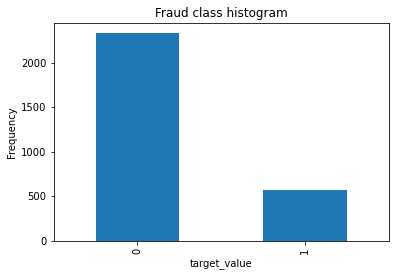

In [4]:
pd.value_counts(df['target_value']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('target_value')
plt.ylabel('Frequency')
# df['target_valuess'].value_counts()

In [5]:
# df.isnull().sum()

In [6]:
X=df.drop('target_value',axis=1)
y=df['target_value'] 

In [7]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
2895    1
2896    1
2897    1
2898    1
2899    1
Name: target_value, Length: 2900, dtype: int64


# Filled the missing values using means strategy

In [8]:
from sklearn.impute import SimpleImputer                                                                                                                          
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X)
X_1 = imputer.transform(X)

In [10]:
# !pip install -U imbalanced-learn

### Balance the Data using SMOTE

In [11]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_1, y = oversample.fit_resample(X_1, y)

In [12]:
y.value_counts()

0    2327
1    2327
Name: target_value, dtype: int64

In [13]:
X_1.shape

(4654, 59)

Text(0, 0.5, 'Frequency')

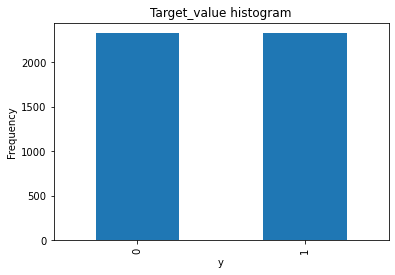

In [14]:
y.value_counts().plot.bar()
plt.title('Target_value histogram')
plt.xlabel('y')
plt.ylabel('Frequency')

# Feature selection 

In [15]:
# from sklearn.ensemble import RandomForestClassifier
# model =RandomForestClassifier(max_depth=1) 
# from boruta import BorutaPy
# feat_selector = BorutaPy(model, n_estimators='auto', verbose=1, random_state=101)
# feat_selector.fit(X_1,y)
# print(feat_selector.support_) 
# print(feat_selector.ranking_) 
# X_filtered1 = feat_selector.transform(X_1)

In [17]:
# X_filtered1 .shape

# Normalized the whole selected features using MinMaxScaler

In [18]:
# Final_selected=X_filtered1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))                        
X= scaler.fit_transform(X_1)

In [20]:
X.shape

(4654, 59)

#  Divided the whole dataset into training and testing by keeping test size 20%

In [31]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=9)
print('training features =',X_train.shape)
print('testing features =',y_train.shape)
print('training labels=',X_test.shape)
print('testing labels =',y_test.shape)

training features = (3723, 59)
testing features = (3723,)
training labels= (931, 59)
testing labels = (931,)


# Random Forest (RF) Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier(n_estimators=100)       
Rfc.fit(X_train, y_train)
prediction = Rfc.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       475
           1       0.92      0.89      0.91       456

    accuracy                           0.91       931
   macro avg       0.91      0.91      0.91       931
weighted avg       0.91      0.91      0.91       931

0.9087003222341569
[[441  34]
 [ 51 405]]


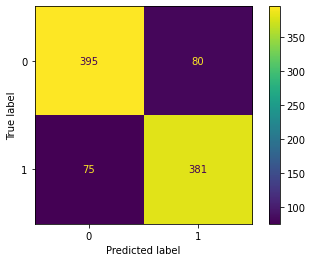

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
disp.plot()

plt.show()

# Support Vector Machine (SVM) Classifier

In [38]:
from sklearn.svm import SVC
from sklearn import svm
# model = svm.LinearSVC(multi_class="ovr")
Svm = svm.SVC()
Svm.fit(X_train, y_train)
prediction = Svm.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       475
           1       0.83      0.84      0.83       456

    accuracy                           0.83       931
   macro avg       0.83      0.83      0.83       931
weighted avg       0.83      0.83      0.83       931

0.8335123523093448
[[395  80]
 [ 75 381]]


# Decision Tree (DT) Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction = DT.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       475
           1       0.79      0.83      0.81       456

    accuracy                           0.81       931
   macro avg       0.81      0.81      0.81       931
weighted avg       0.81      0.81      0.81       931

0.8098818474758325
[[375 100]
 [ 77 379]]


# Gradient Boosting  (GB) Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=101)
GB.fit(X_train, y_train)
prediction = GB.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       475
           1       0.91      0.84      0.87       456

    accuracy                           0.88       931
   macro avg       0.88      0.88      0.88       931
weighted avg       0.88      0.88      0.88       931

0.8796992481203008
[[435  40]
 [ 72 384]]


# K nearest Neighbor (KNN) Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=2)
KNN .fit(X_train, y_train)
prediction = KNN .predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       475
           1       0.84      0.89      0.86       456

    accuracy                           0.86       931
   macro avg       0.86      0.86      0.86       931
weighted avg       0.86      0.86      0.86       931

0.8592910848549946
[[395  80]
 [ 51 405]]


# EXtreme Gradient Boosting (XGB) Classifier

In [84]:
# !pip install xgboost

In [44]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
prediction = XGB.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       475
           1       0.93      0.85      0.89       456

    accuracy                           0.90       931
   macro avg       0.90      0.90      0.90       931
weighted avg       0.90      0.90      0.90       931

0.8968850698174007
[[446  29]
 [ 67 389]]


# Multi Layer Perceptron (MLP) Classifier

In [45]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(max_iter=1500,activation='relu', learning_rate_init=0.001,shuffle=True,
                    learning_rate='constant', beta_1=0.999, beta_2=0.9 , momentum=0.88,
                    power_t=0.9, solver='lbfgs', alpha=1e-6, random_state=101)
MLP.fit(X_train, y_train)
prediction = MLP.predict(X_test)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       475
           1       0.84      0.89      0.86       456

    accuracy                           0.86       931
   macro avg       0.86      0.86      0.86       931
weighted avg       0.86      0.86      0.86       931

0.8635875402792696
[[400  75]
 [ 52 404]]


### ANN Model

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow_addons import losses
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.layers import Activation, Dense


In [49]:
print('training features =',X_train.shape)
print('testing features =',y_train.shape)
print('training labels=',X_test.shape)
print('testing labels =',y_test.shape)

training features = (3723, 59)
testing features = (3723,)
training labels= (931, 59)
testing labels = (931,)


In [55]:
ANN = keras.Sequential([
        keras.layers.Dense(59, input_dim=59, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

ANN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=150)

Epoch 1/150
117/117 [==============================] - 1s 2ms/step - loss: 0.6314 - accuracy: 0.6387
Epoch 2/150
117/117 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7088
Epoch 3/150
117/117 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7271
Epoch 4/150
117/117 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.7427
Epoch 5/150
117/117 [==============================] - 0s 1ms/step - loss: 0.4940 - accuracy: 0.7615
Epoch 6/150
117/117 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7690
Epoch 7/150
117/117 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7830
Epoch 8/150
117/117 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.7926
Epoch 9/150
117/117 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.7972
Epoch 10/150
117/117 [==============================] - 0s 1ms/step - loss: 0.4139 - accura

117/117 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9578
Epoch 82/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1311 - accuracy: 0.9514
Epoch 83/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1079 - accuracy: 0.9621
Epoch 84/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1189 - accuracy: 0.9584
Epoch 85/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9627
Epoch 86/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1124 - accuracy: 0.9602
Epoch 87/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1192 - accuracy: 0.9533
Epoch 88/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1084 - accuracy: 0.9627
Epoch 89/150
117/117 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9629
Epoch 90/150
117/117 [==============================] - 0s 1ms/step - loss: 0.1164 - accuracy: 

In [56]:
print(ANN.evaluate(X_train, y_train))

117/117 [==============================] - 0s 1ms/step - loss: 0.0377 - accuracy: 0.9890
[0.0376647524535656, 0.988987386226654]


In [59]:
y_preds = ANN.predict(X_test)
y_preds = np.round(y_preds)
    
print("Classification Report: \n", classification_report(y_test, y_preds))
    

30/30 [==============================] - 0s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       475
           1       0.83      0.90      0.86       456

    accuracy                           0.86       931
   macro avg       0.86      0.86      0.86       931
weighted avg       0.86      0.86      0.86       931

